Atividades
===

Essas atividade são relativas a aulas de Machine Learning.

> Lembre de criar uma `virtualenv` com os `requirements.txt` do repositório.

> Lembre de criar uma `kernel` do jupyter para seus desenvolvimentos

> Enviei apenas o seu notebook para correção. Não é necessário enviar nenhum outro arquivo. Siga o padrão `Atividades-<NOME-DO-ALUNO>.ipynb`

# Machine Learning

## 1. Classificação com *hold-out*.

## Imports

In [122]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris


############## 3 Questão ################

import cv2
import os
import glob
import csv
from skimage import feature

## Carregue a base

In [123]:
def load():
    data = pd.read_csv("diabetes.csv")
    X = data.iloc[:, :-1].values  
    z = data.iloc[:, 8].values
    lb = LabelEncoder()
    z[:] = lb.fit_transform(z[:])
    y = z.astype('int') 
    
    return X,y

a) Utilize o método hold-out para dividir a base de dados [diabetes.csv](https://github.com/lapisco/machine_learning_course/blob/master/data/diabetes.csv) em treino e teste (50 iterações).

**help**: [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) (converte o rótulo da classe para 0 e 1) e [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) (divisão balanceada dos dados).

In [95]:
hold = StratifiedShuffleSplit(n_splits=50, test_size=0.25)

b) Use os classificadores MLP e QDA dentro do método hold-out do item anterior.

**help**: [Taxa de acerto do kNN com base Iris](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo do kNN com hold-out), [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html) e [Multilayer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [96]:
X, y = load()

time_qda =[]
acc_qda = []
rec_qda = []
f1_qda = []

time_mlp = []
acc_mlp = []
rec_mlp = []
f1_mlp = []

count = 0
for train_index, test_index in hold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    indexs, c = np.unique(y_test, return_counts=True)
    print('\nQuantidade de amostras por classe: {} {}'.format(c, np.sum(c)))
    
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    qda.fit(X, y)
    
    ti_qda = time.time()
    qda_predicted = qda.predict(X_test)
    tf_qda = time.time()
    
    #QDA 
    acc_q = accuracy_score(y_test, qda_predicted)
    rec_q = recall_score(y_test, qda_predicted)
    f1_q = f1_score(y_test, qda_predicted)
    
    acc_qda.append(acc_q)
    rec_qda.append(rec_q)
    f1_qda.append(f1_q)
    time_qda.append((tf_qda - ti_qda))
    
    mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=9000, learning_rate_init=5e-04, tol=1e-4)

    mlp.fit(X, y)
    
    ti_mlp = time.time()
    mlp_predicted = mlp.predict(X_test)
    tf_mlp = time.time()
    
    
    #MLP
    acc_m = accuracy_score(y_test, mlp_predicted)
    rec_m = recall_score(y_test, mlp_predicted)
    f1_m = f1_score(y_test, mlp_predicted)
    
    acc_mlp.append(acc_m)
    rec_mlp.append(rec_m)
    f1_mlp.append(f1_m)
    time_mlp.append((tf_mlp - ti_mlp))
    
    count+=1


Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192


c) Calcule a média e o desvio padrão das métricas a seguir para os classificadores do item anterior:
- acurácia
- sensibilidade (recall)
- f1_score
- tempo de teste    

**help**: use as funções do [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). Dica de leitura https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [97]:
#Média QDA

acc_qda_m = sum(acc_qda)/count
rec_qda_m = sum(rec_qda)/count
f1_qda_m = sum(f1_qda)/count
t_qda_m = sum(time_qda)/count

print('Média - Acurácia: ', acc_qda_m)
print('Média - Sensibilidade: ', rec_qda_m)
print('Média - F1: ', f1_qda_m)
print('Média - Tempo de teste: ', t_qda_m)
print('\n')
#Desvio Padrão MLP

acc_qda_dp = np.std(acc_qda)
rec_qda_dp = np.std(rec_qda)
f1_qda_dp = np.std(f1_qda)
t_qda_dp = np.std(time_qda)

print('Desvio Padrão - Acurácia: ', acc_qda_dp)
print('Desvio Padrão - Sensibilidade: ', rec_qda_dp)
print('Desvio Padrão - F1: ', f1_qda_dp)
print('Desvio Padrão - Tempo de teste: ', t_qda_dp)

Média - Acurácia:  0.7635416666666669
Média - Sensibilidade:  0.5841791044776119
Média - F1:  0.6325331732928877
Média - Tempo de teste:  0.00048634052276611326


Desvio Padrão - Acurácia:  0.025979091486124855
Desvio Padrão - Sensibilidade:  0.049232016923031356
Desvio Padrão - F1:  0.041193031821976374
Desvio Padrão - Tempo de teste:  0.0001327606194075986


In [98]:
#Média MLP

acc_mlp_m = sum(acc_mlp)/count
rec_mlp_m = sum(rec_mlp)/count
f1_mlp_m = sum(f1_mlp)/count
t_mlp_m = sum(time_mlp)/count

print('Média - Acurácia: ', acc_mlp_m)
print('Média - Sensibilidade: ', rec_mlp_m)
print('Média - F1: ', f1_mlp_m)
print('Média - Tempo de teste: ', t_mlp_m)

print('\n')

#Desvio Padrão MLP

acc_mlp_dp = np.std(acc_mlp)
rec_mlp_dp = np.std(rec_mlp)
f1_mlp_dp = np.std(f1_mlp)
t_mlp_dp = np.std(time_mlp)

print('Desvio Padrão - Acurácia: ', acc_mlp_dp)
print('Desvio Padrão - Sensibilidade: ', rec_mlp_dp)
print('Desvio Padrão - F1: ', f1_mlp_dp)
print('Desvio Padrão - Tempo de teste: ', t_mlp_dp)

Média - Acurácia:  0.7621875
Média - Sensibilidade:  0.5698507462686567
Média - F1:  0.6224845997736651
Média - Tempo de teste:  0.0007978963851928711


Desvio Padrão - Acurácia:  0.02737443714540589
Desvio Padrão - Sensibilidade:  0.09237781150210997
Desvio Padrão - F1:  0.05686597242830808
Desvio Padrão - Tempo de teste:  0.0003231090556430002


## 2. Gráfico de superfície de decisão

- Plote a superfície de decisão de todas as combinações de atributos para o SVM com kernel Linear e RBF usando a base de dados da Iris. Escolha os hiperparâmetros usando o RandomizedSearchCV.

**help**: [decision_surface_mlp()](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo da superfície de decisão com MLP), [Random Search](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo do RandomizedSearchCV)

----------setosa com others----------


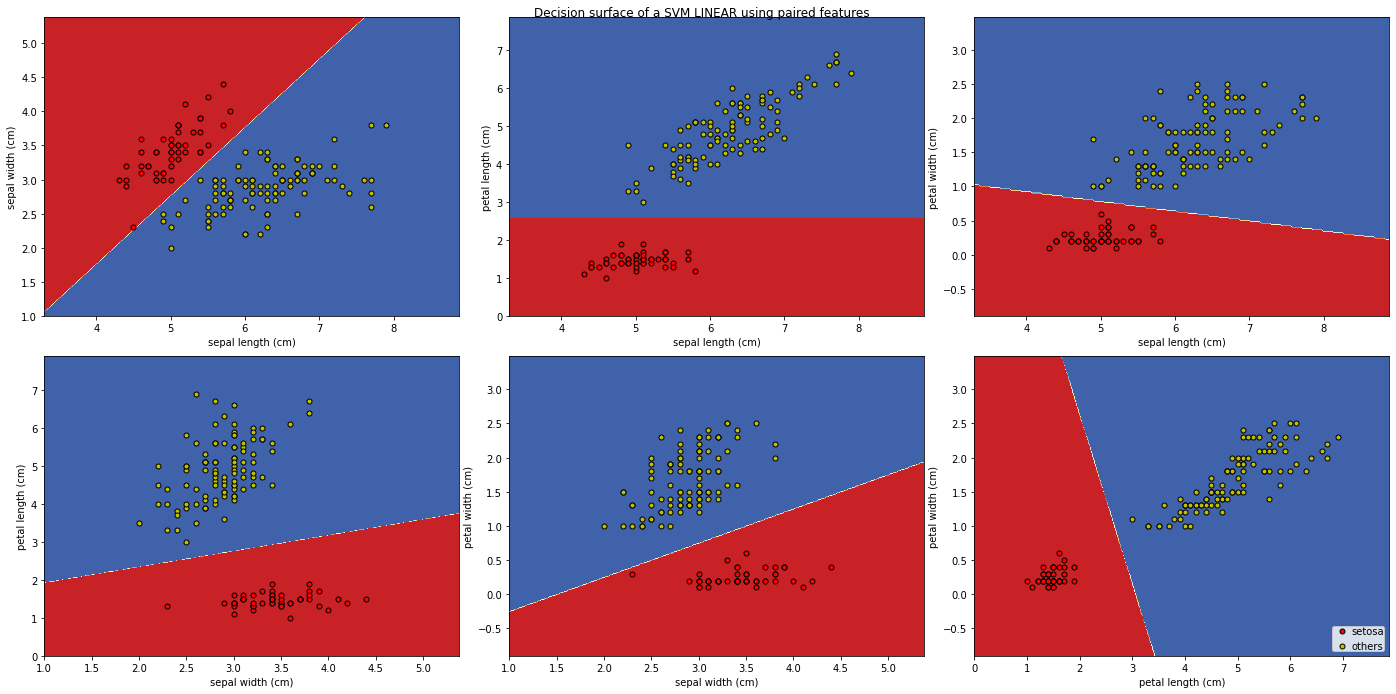

----------versicolour com others----------


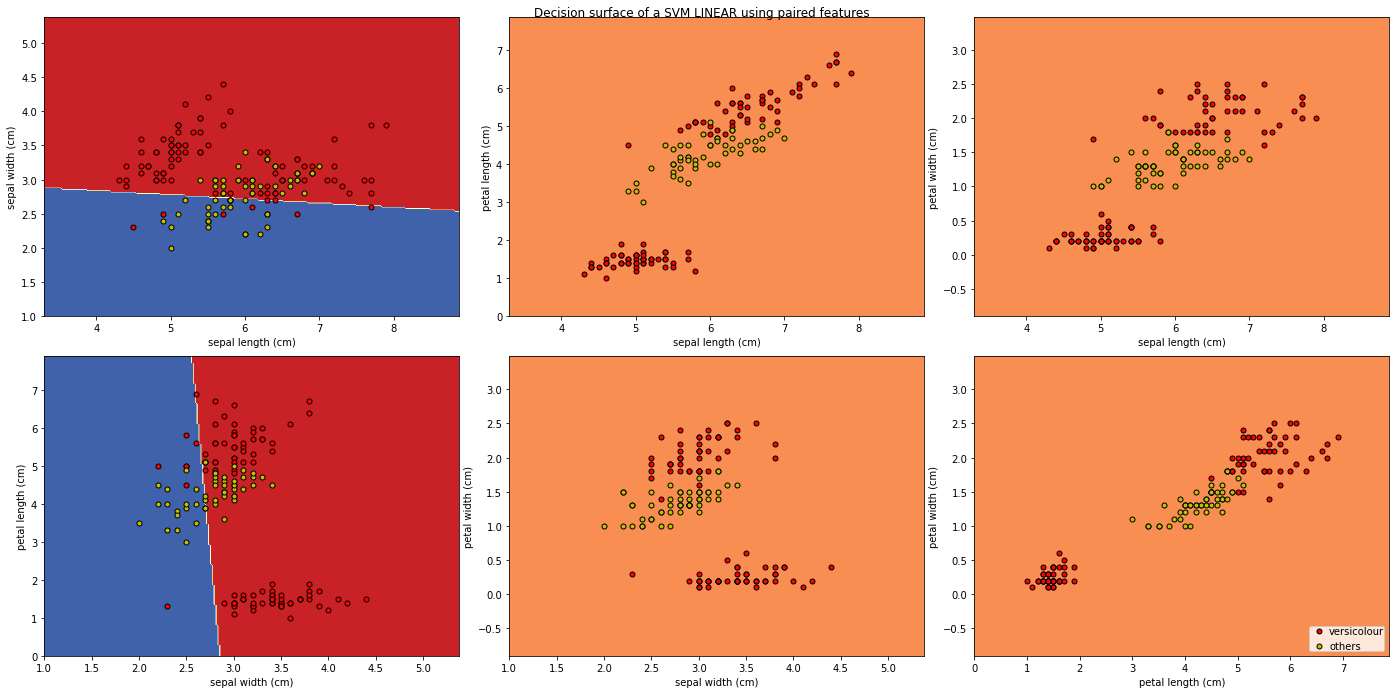

----------virginica com others----------


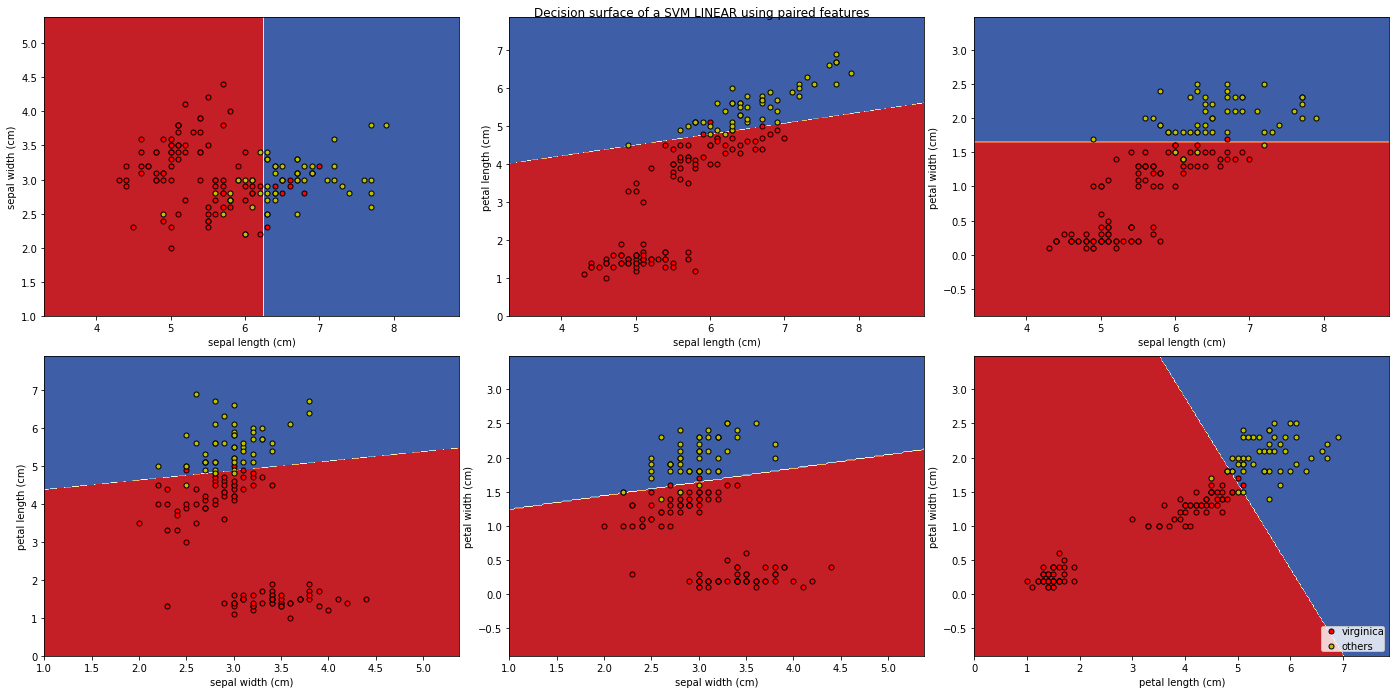

In [99]:
#SVM LINEAR

def decision_surface(n_classes):
    for i in range(3):
        plot_colors = "ryb"
        plot_step = 0.02
        tipo = i
        # Load data
        iris = load_iris()

        target_names = iris.target_names
    
        if n_classes == 2:
            if tipo == 0:             
                target_names = ['setosa', 'others']
            if tipo == 1:
                target_names = ['versicolour', 'others']
            if tipo == 2:
                target_names = ['virginica', 'others']
        
        for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
            X = iris.data[:, pair]
            y = iris.target
            if n_classes == 2:
                if tipo == 0:
                    y[y == 2] = 1
                if tipo ==1:
                    y[y == 2] = 0
                if tipo == 2:
                    y[y ==0] = 1
        # Train
            svm_linear = SVC(kernel = 'linear')
            svm_rbf_clf = SVC(kernel = 'rbf')

            classifiers = {'SVM-LINEAR': svm_linear, 'SVM-RBF': svm_rbf_clf}

        # Define param range for searching:
            param_dist_dict = {'SVM-LINEAR': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]},
                   'SVM-RBF': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]}}


            random_search = dict((k,[]) for k in classifiers.keys())

            for clf in param_dist_dict.keys():
                random_search[clf] = RandomizedSearchCV(classifiers[clf], param_dist_dict[clf], cv=3, n_iter=5, 
                                            verbose=0, scoring='accuracy')
                random_search[clf].fit(X, y)
            
            clf_linear = random_search['SVM-LINEAR'].best_estimator_
            clf_rbf = random_search['SVM-RBF'].best_estimator_
            
        # Plot the decision boundary
            plt.figure(1, figsize=(20,10))
            plt.subplot(2, 3, pairidx + 1)

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

            plt.xlabel(iris.feature_names[pair[0]])
            plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
            for i, color in zip(range(n_classes), plot_colors):
                if(tipo == 2):
                    idx = np.where(y == i+1)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
                else:
                    idx = np.where(y == i)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
        print("----------"+ target_names[0] + " com "+ target_names[1] +"----------")

        plt.suptitle("Decision surface of a SVM LINEAR using paired features")
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
        plt.axis("tight")
        plt.show()

if __name__ == '__main__':

    decision_surface(2)

----------setosa com others----------


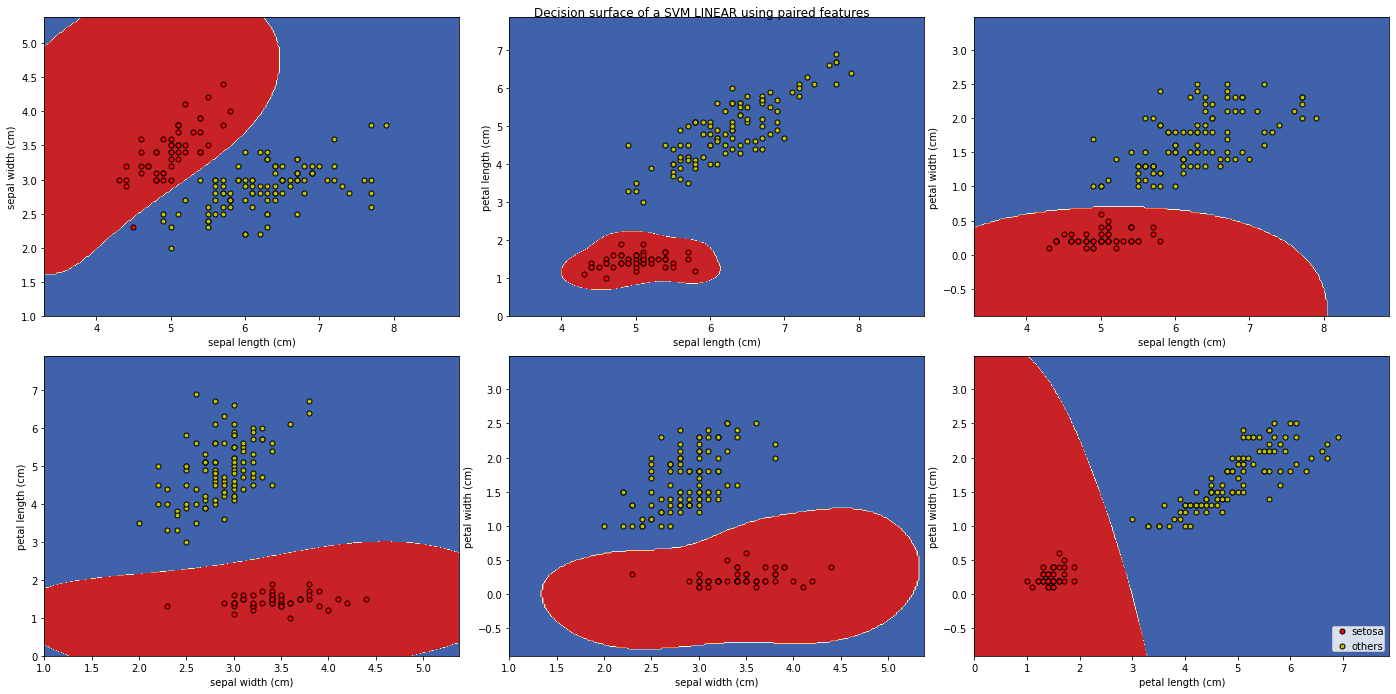

----------versicolour com others----------


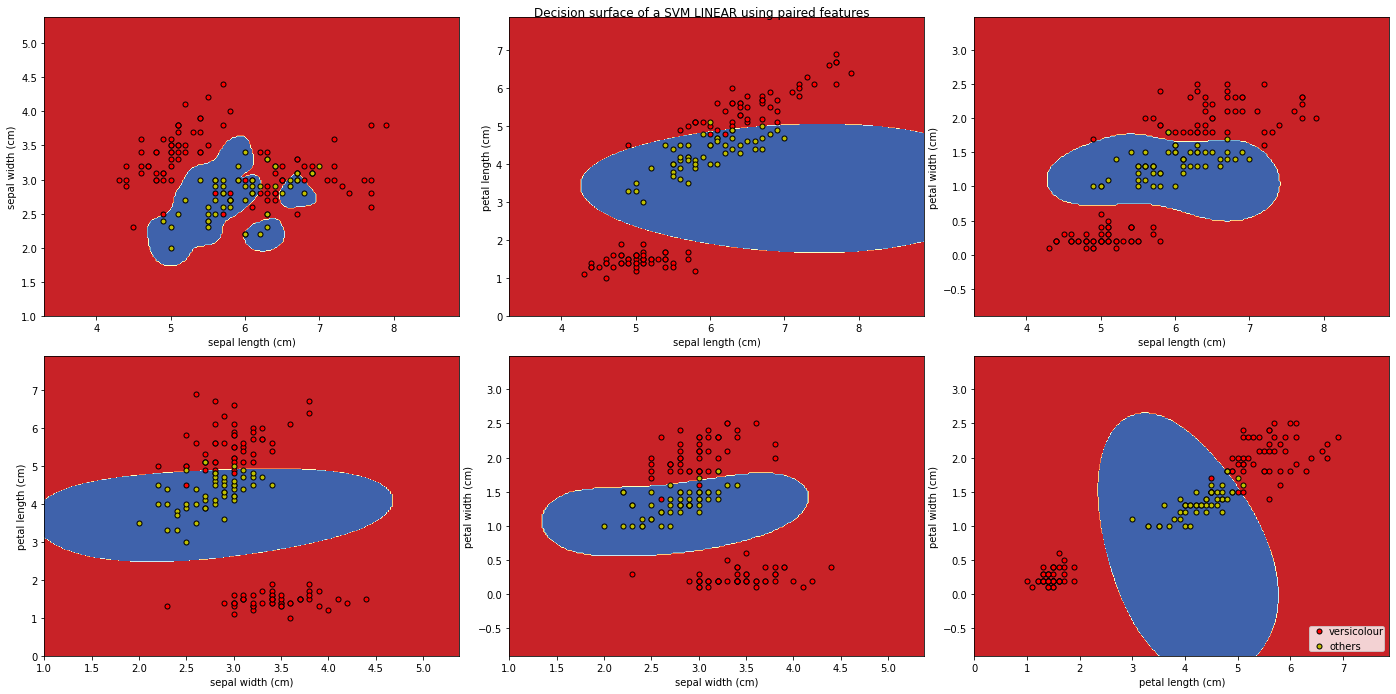

----------virginica com others----------


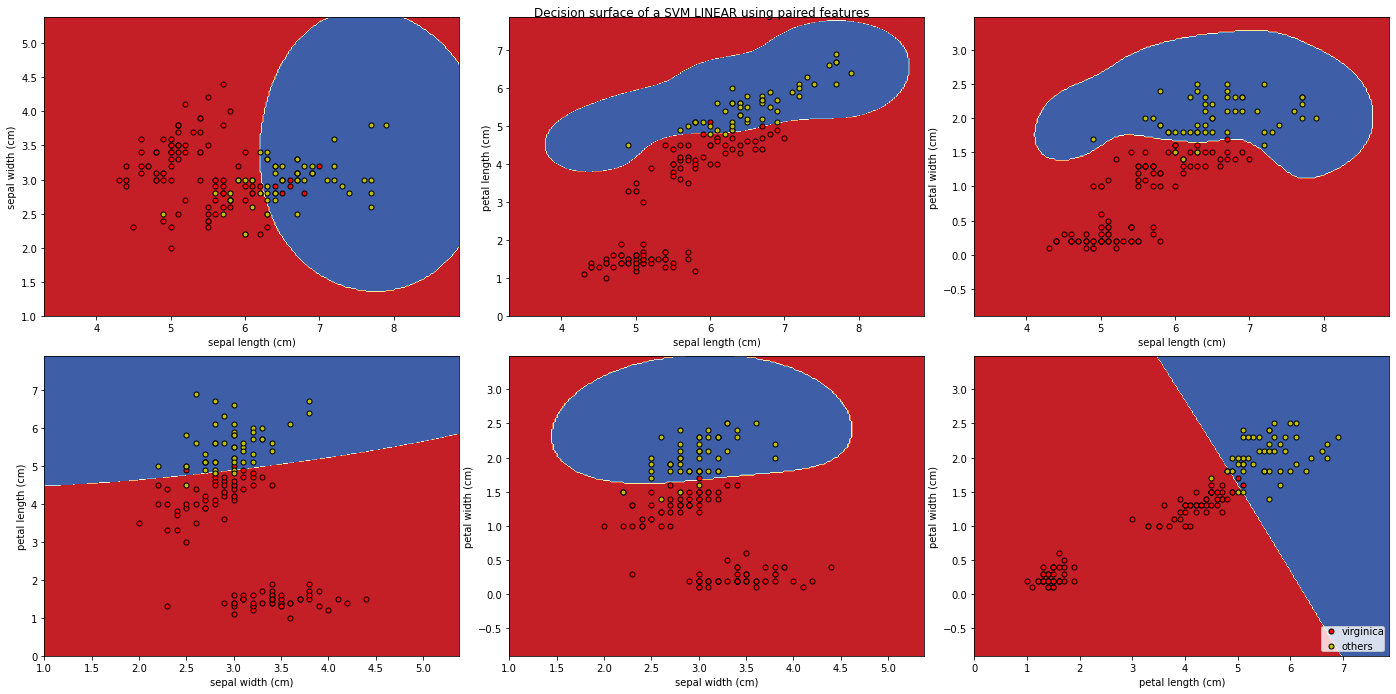

In [100]:
#SVM RBF

def decision_surface(n_classes):
    for i in range(3):
        plot_colors = "ryb"
        plot_step = 0.02
        tipo = i
        # Load data
        iris = load_iris()

        target_names = iris.target_names
    
        if n_classes == 2:
            if tipo == 0:             
                target_names = ['setosa', 'others']
            if tipo == 1:
                target_names = ['versicolour', 'others']
            if tipo == 2:
                target_names = ['virginica', 'others']
        
        for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
            X = iris.data[:, pair]
            y = iris.target
            if n_classes == 2:
                if tipo == 0:
                    y[y == 2] = 1
                if tipo ==1:
                    y[y == 2] = 0
                if tipo == 2:
                    y[y ==0] = 1
        # Train
            svm_linear = SVC(kernel = 'linear')
            svm_rbf_clf = SVC(kernel = 'rbf')

            classifiers = {'SVM-LINEAR': svm_linear, 'SVM-RBF': svm_rbf_clf}

        # Define param range for searching:
            param_dist_dict = {'SVM-LINEAR': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]},
                   'SVM-RBF': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]}}


            random_search = dict((k,[]) for k in classifiers.keys())

            for clf in param_dist_dict.keys():
                random_search[clf] = RandomizedSearchCV(classifiers[clf], param_dist_dict[clf], cv=3, n_iter=5, 
                                            verbose=0, scoring='accuracy')
                random_search[clf].fit(X, y)
            
            clf_linear = random_search['SVM-LINEAR'].best_estimator_
            clf_rbf = random_search['SVM-RBF'].best_estimator_
            
        # Plot the decision boundary
            plt.figure(1, figsize=(20,10))
            plt.subplot(2, 3, pairidx + 1)

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

            plt.xlabel(iris.feature_names[pair[0]])
            plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
            for i, color in zip(range(n_classes), plot_colors):
                if(tipo == 2):
                    idx = np.where(y == i+1)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
                else:
                    idx = np.where(y == i)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
        print("----------"+ target_names[0] + " com "+ target_names[1] +"----------")

        plt.suptitle("Decision surface of a SVM LINEAR using paired features")
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
        plt.axis("tight")
        plt.show()

if __name__ == '__main__':

    decision_surface(2)

## 3. Extração de atributos e classificação

a) Crie uma base de dados utilizando algum dos extratores de características visto no módulo 2 (LBP, HU ou GLCM) com as imagens do link a seguir. Cada imagem representará uma amostra e seus atributos serão obtidos pelo extrator escolhido. Use o nome do arquivo para saber a classe. Por exemplo, ``P01_01.JPG`` será a 1&deg; amostra e sua classe será a 1, enquanto a imagem ``P02_02.JPG`` será a 42&deg; amostra e sua classe será a 2. Ao final, sua base de dados deve ser composta por 600 amostras com 15 classes (40 amostras por classe). \
[Imagens](https://www.dropbox.com/sh/fwp8l3jt1hbd5ya/AAByxHuzLK_EFLawWieR1eUHa?dl=0) \
[Site com a descrição](https://lapisco.ifce.edu.br/producao-academica/private-datasets/image-database-of-virtual-and-real-environment-for-mobile-robot-localization-from-gopro/)

In [124]:
def extract_hu(images):
    print('[INFO] Extracting HU.')
    hu_features = []

    for i, image in enumerate(images):

        print('[INFO] Extracting features of image {}/{}'.format(i + 1, len(images)))

        # Load the rgb image
        file = cv2.imread(image)

        # Convert to grayscale
        file = cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)

        # Extract lbp
        hu = cv2.moments(file)
        #feature.greycomatrix(file, distances, angles, 256, symmetric=False, normed=True)

        # Create a list with the features of GLCM
        
        hu_features.append(np.asarray(cv2.HuMoments(hu).flatten()))
        
        #glcm_properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        #features = [feature.greycoprops(glcm, glcm_property)[0, 0] for glcm_property in glcm_properties]

        #glcm_features.append(features)

    print('\n')

    return hu_features


In [125]:
def save_results(extractor_name, features):

    for vector in features:
        print(vector)

    with open(extractor_name + '.csv', 'w') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(features)

In [126]:
dataset = 'roboHomeGoPro'

image_paths = glob.glob(os.path.join(dataset, '*.JPG'))

features = extract_hu(image_paths)

save_results('HU', features)

[INFO] Extracting HU.
[INFO] Extracting features of image 1/600
[INFO] Extracting features of image 2/600
[INFO] Extracting features of image 3/600
[INFO] Extracting features of image 4/600
[INFO] Extracting features of image 5/600
[INFO] Extracting features of image 6/600
[INFO] Extracting features of image 7/600
[INFO] Extracting features of image 8/600
[INFO] Extracting features of image 9/600
[INFO] Extracting features of image 10/600
[INFO] Extracting features of image 11/600
[INFO] Extracting features of image 12/600
[INFO] Extracting features of image 13/600
[INFO] Extracting features of image 14/600
[INFO] Extracting features of image 15/600
[INFO] Extracting features of image 16/600
[INFO] Extracting features of image 17/600
[INFO] Extracting features of image 18/600
[INFO] Extracting features of image 19/600
[INFO] Extracting features of image 20/600
[INFO] Extracting features of image 21/600
[INFO] Extracting features of image 22/600
[INFO] Extracting features of image 23/60

[INFO] Extracting features of image 191/600
[INFO] Extracting features of image 192/600
[INFO] Extracting features of image 193/600
[INFO] Extracting features of image 194/600
[INFO] Extracting features of image 195/600
[INFO] Extracting features of image 196/600
[INFO] Extracting features of image 197/600
[INFO] Extracting features of image 198/600
[INFO] Extracting features of image 199/600
[INFO] Extracting features of image 200/600
[INFO] Extracting features of image 201/600
[INFO] Extracting features of image 202/600
[INFO] Extracting features of image 203/600
[INFO] Extracting features of image 204/600
[INFO] Extracting features of image 205/600
[INFO] Extracting features of image 206/600
[INFO] Extracting features of image 207/600
[INFO] Extracting features of image 208/600
[INFO] Extracting features of image 209/600
[INFO] Extracting features of image 210/600
[INFO] Extracting features of image 211/600
[INFO] Extracting features of image 212/600
[INFO] Extracting features of im

[INFO] Extracting features of image 378/600
[INFO] Extracting features of image 379/600
[INFO] Extracting features of image 380/600
[INFO] Extracting features of image 381/600
[INFO] Extracting features of image 382/600
[INFO] Extracting features of image 383/600
[INFO] Extracting features of image 384/600
[INFO] Extracting features of image 385/600
[INFO] Extracting features of image 386/600
[INFO] Extracting features of image 387/600
[INFO] Extracting features of image 388/600
[INFO] Extracting features of image 389/600
[INFO] Extracting features of image 390/600
[INFO] Extracting features of image 391/600
[INFO] Extracting features of image 392/600
[INFO] Extracting features of image 393/600
[INFO] Extracting features of image 394/600
[INFO] Extracting features of image 395/600
[INFO] Extracting features of image 396/600
[INFO] Extracting features of image 397/600
[INFO] Extracting features of image 398/600
[INFO] Extracting features of image 399/600
[INFO] Extracting features of im

[INFO] Extracting features of image 565/600
[INFO] Extracting features of image 566/600
[INFO] Extracting features of image 567/600
[INFO] Extracting features of image 568/600
[INFO] Extracting features of image 569/600
[INFO] Extracting features of image 570/600
[INFO] Extracting features of image 571/600
[INFO] Extracting features of image 572/600
[INFO] Extracting features of image 573/600
[INFO] Extracting features of image 574/600
[INFO] Extracting features of image 575/600
[INFO] Extracting features of image 576/600
[INFO] Extracting features of image 577/600
[INFO] Extracting features of image 578/600
[INFO] Extracting features of image 579/600
[INFO] Extracting features of image 580/600
[INFO] Extracting features of image 581/600
[INFO] Extracting features of image 582/600
[INFO] Extracting features of image 583/600
[INFO] Extracting features of image 584/600
[INFO] Extracting features of image 585/600
[INFO] Extracting features of image 586/600
[INFO] Extracting features of im

In [127]:
df = pd.read_csv("HU.csv", names=["f0", "f1", "f2", "f3", "f4","f5","f6"])

In [128]:
df['coluna'] = 0

In [129]:
df.loc[0:39, 'coluna'] = 1
df.loc[40:79, 'coluna'] = 2
df.loc[80:119, 'coluna'] = 3
df.loc[120:159, 'coluna'] = 4
df.loc[160:199, 'coluna'] = 5
df.loc[200:239, 'coluna'] = 6
df.loc[240:279, 'coluna'] = 7
df.loc[280:319, 'coluna'] = 8
df.loc[320:359, 'coluna'] = 9
df.loc[360:399, 'coluna'] = 10
df.loc[400:439, 'coluna'] = 11
df.loc[440:479, 'coluna'] = 12
df.loc[480:519, 'coluna'] = 13
df.loc[520:559, 'coluna'] = 14
df.loc[560:599, 'coluna'] = 15

In [130]:
df.groupby('coluna').count()

,f0,f1,f2,f3,f4,f5,f6
coluna,,,,,,,
1,40,40,40,40,40,40,40
2,40,40,40,40,40,40,40
3,40,40,40,40,40,40,40
4,40,40,40,40,40,40,40
5,40,40,40,40,40,40,40
6,40,40,40,40,40,40,40
7,40,40,40,40,40,40,40
8,40,40,40,40,40,40,40
9,40,40,40,40,40,40,40


b) Repita a primeira questão com a base de dados criada no item anterior.

In [131]:
A = df.iloc[:, :-1].values
t = df.iloc[:, 7].values

In [132]:
t = t.astype('int')
t[0]

1

In [133]:
hold = StratifiedShuffleSplit(n_splits=50, test_size=0.25)

In [134]:
time_qda =[]
acc_qda = []
rec_qda = []
f1_qda = []

time_mlp = []
acc_mlp = []
rec_mlp = []
f1_mlp = []

count = 0
for train_index, test_index in hold.split(A, t):
    A_train, A_test = A[train_index], A[test_index]
    t_train, t_test = t[train_index], t[test_index]

    indexs, c = np.unique(t_test, return_counts=True)
    print('\nQuantidade de amostras por classe: {} {}'.format(c, np.sum(c)))
    
    
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    qda.fit(A,t)
    
    ti_qda = time.time()
    qda_predicted = qda.predict(A_test)
    tf_qda = time.time()
    
    #QDA 
    acc_q = accuracy_score(t_test, qda_predicted)
    rec_q = recall_score(t_test, qda_predicted, average = 'micro')
    f1_q = f1_score(t_test, qda_predicted, average = 'micro')
    
    acc_qda.append(acc_q)
    rec_qda.append(rec_q)
    f1_qda.append(f1_q)
    
    time_qda.append((tf_qda - ti_qda))
    
    mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=9000, learning_rate_init=5e-04, tol=1e-4)

    mlp.fit(A,t)
    
    ti_mlp = time.time()
    mlp_predicted = mlp.predict(A_test)
    tf_mlp = time.time()
    
    
    #MLP
    acc_m = accuracy_score(t_test, mlp_predicted)
    rec_m = recall_score(t_test, mlp_predicted, average = 'micro')
    f1_m = f1_score(t_test, mlp_predicted, average = 'micro')
    
    acc_mlp.append(acc_m)
    rec_mlp.append(rec_m)
    f1_mlp.append(f1_m)
    
    time_mlp.append((tf_mlp - ti_mlp))
    
    count+=1


Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10] 150


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [135]:
#Média QDA

acc_qda_m = sum(acc_qda)/count
rec_qda_m = sum(rec_qda)/count
f1_qda_m = sum(f1_qda)/count
t_qda_m = sum(time_qda)/count

print('Média - Acurácia: ', acc_qda_m)
print('Média - Sensibilidade: ', rec_qda_m)
print('Média - F1: ', f1_qda_m)
print('Média - Tempo de teste: ', t_qda_m)
print('\n')
#Desvio Padrão MLP

acc_qda_dp = np.std(acc_qda)
rec_qda_dp = np.std(rec_qda)
f1_qda_dp = np.std(f1_qda)
t_qda_dp = np.std(time_qda)

print('Desvio Padrão - Acurácia: ', acc_qda_dp)
print('Desvio Padrão - Sensibilidade: ', rec_qda_dp)
print('Desvio Padrão - F1: ', f1_qda_dp)
print('Desvio Padrão - Tempo de teste: ', t_qda_dp)

Média - Acurácia:  0.12053333333333334
Média - Sensibilidade:  0.12053333333333334
Média - F1:  0.12053333333333334
Média - Tempo de teste:  0.0016043853759765624


Desvio Padrão - Acurácia:  0.02047611074181596
Desvio Padrão - Sensibilidade:  0.02047611074181596
Desvio Padrão - F1:  0.02047611074181596
Desvio Padrão - Tempo de teste:  0.00028104269196483885


In [136]:
#Média MLP

acc_mlp_m = sum(acc_mlp)/count
rec_mlp_m = sum(rec_mlp)/count
f1_mlp_m = sum(f1_mlp)/count
t_mlp_m = sum(time_mlp)/count

print('Média - Acurácia: ', acc_mlp_m)
print('Média - Sensibilidade: ', rec_mlp_m)
print('Média - F1: ', f1_mlp_m)
print('Média - Tempo de teste: ', t_mlp_m)

print('\n')

#Desvio Padrão MLP

acc_mlp_dp = np.std(acc_mlp)
rec_mlp_dp = np.std(rec_mlp)
f1_mlp_dp = np.std(f1_mlp)
t_mlp_dp = np.std(time_mlp)

print('Desvio Padrão - Acurácia: ', acc_mlp_dp)
print('Desvio Padrão - Sensibilidade: ', rec_mlp_dp)
print('Desvio Padrão - F1: ', f1_mlp_dp)
print('Desvio Padrão - Tempo de teste: ', t_mlp_dp)

Média - Acurácia:  0.06666666666666674
Média - Sensibilidade:  0.06666666666666674
Média - F1:  0.06666666666666674
Média - Tempo de teste:  0.0009061479568481445


Desvio Padrão - Acurácia:  0.0
Desvio Padrão - Sensibilidade:  0.0
Desvio Padrão - F1:  0.0
Desvio Padrão - Tempo de teste:  9.378117282445645e-05
